In [1]:
#FDS Code for different problems combined here

## 1. Use decision tree, random forests, KNN and LDA to predict whether the person will default. Compare the findings from different methods.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_path = "Default.xlsx"

In [5]:
df = pd.read_excel(file_path)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


        Unnamed: 0       balance        income
count  10000.00000  10000.000000  10000.000000
mean    5000.50000    835.374886  33516.981876
std     2886.89568    483.714985  13336.639563
min        1.00000      0.000000    771.967729
25%     2500.75000    481.731105  21340.462903
50%     5000.50000    823.636973  34552.644802
75%     7500.25000   1166.308386  43807.729272
max    10000.00000   2654.322576  73554.233495


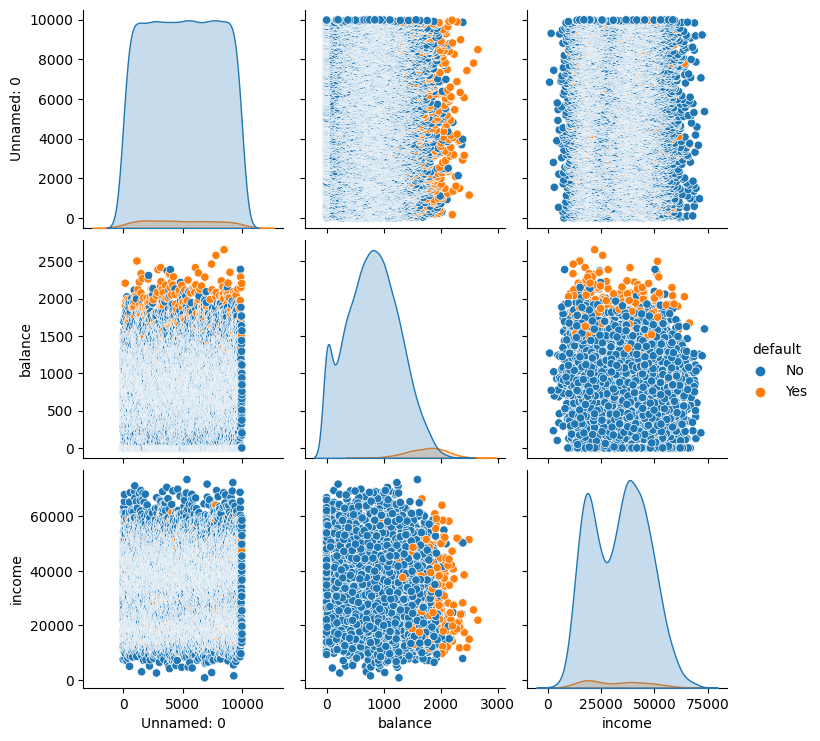

<ipython-input-6-c2dfe8ee7e00>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


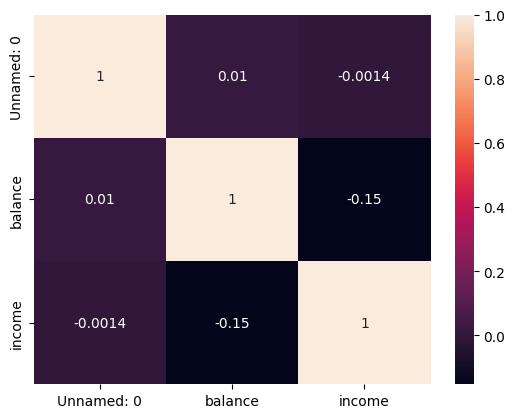

In [6]:
print(df.describe())
sns.pairplot(df, hue='default')
plt.show()
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
# Convert categorical variables to numerical using get_dummies
df = pd.get_dummies(df, columns=['default', 'student'])

In [8]:
# Separate features and target variable
X = df.drop('default_Yes', axis=1)
y = df['default_Yes']

In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# Train and evaluate models
model_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_predictions = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"{name} - Test Accuracy: {test_accuracy}")

    # Calculate additional Evaluation Metrics
    class_report = classification_report(y_test, test_predictions)
    conf_matrix = confusion_matrix(y_test, test_predictions)

    # Store results in model_results dictionary
    model_results[name] = {
        'Test Accuracy': test_accuracy,
        'Classification Report': class_report,
        'Confusion Matrix': conf_matrix
    }

    # Display additional evaluation metrics
    print(f"Classification Report for {name}:")
    print(class_report)
    print(f"Confusion Matrix for {name}:")
    print(conf_matrix)
    print("--------------------------------------------")

Decision Tree - Test Accuracy: 1.0
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1931
           1       1.00      1.00      1.00        69

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix for Decision Tree:
[[1931    0]
 [   0   69]]
--------------------------------------------
Random Forest - Test Accuracy: 1.0
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1931
           1       1.00      1.00      1.00        69

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix for Random Forest:
[[1931    0]
 [   0   69]]
-----------------------

## 2. Use PCA and SVD to reduce the dimension of the data 2 so that the reduced data has 5, 10,15 and 20 columns. Give an exploratory data analysis on SVD data with 5 columns.

Summary of the data:
       Unnamed: 0            1            2            3            4  \
count  2500.00000  2500.000000  2500.000000  2500.000000  2500.000000   
mean   1249.50000    19.436420    19.974677    20.207614    20.359998   
std     721.83216    20.114557    20.947014    20.748332    21.525254   
min       0.00000    -9.378292    -9.875271    -9.622198    -9.074825   
25%     624.75000     5.828970     6.043946     6.181921     5.707541   
50%    1249.50000    14.289522    14.656679    14.907659    14.566654   
75%    1874.25000    27.741491    28.217891    29.341570    29.230626   
max    2499.00000   165.964596   210.494579   203.680246   164.252158   

                 5            6            7            8            9  ...  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000  ...   
mean     20.034612    19.957323    19.431995    19.656091    20.055373  ...   
std      20.606300    20.690533    20.148964    21.100771    21.475233  ...   
min  

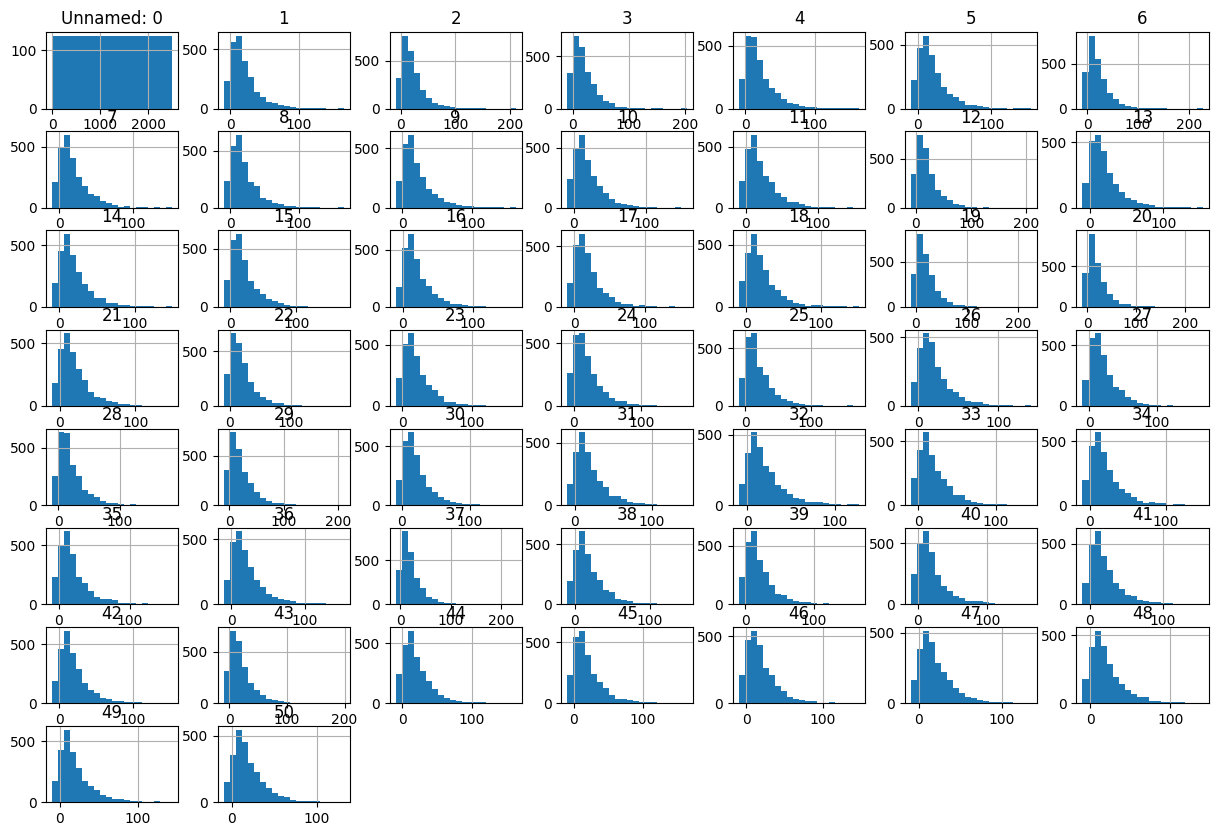

Correlation between features:
            Unnamed: 0         1         2         3         4         5  \
Unnamed: 0    1.000000  0.003131 -0.013256  0.018592 -0.003346 -0.025166   
1             0.003131  1.000000 -0.019440  0.055996 -0.027597 -0.010118   
2            -0.013256 -0.019440  1.000000  0.025627  0.005379 -0.007857   
3             0.018592  0.055996  0.025627  1.000000 -0.009394 -0.005564   
4            -0.003346 -0.027597  0.005379 -0.009394  1.000000  0.039029   
5            -0.025166 -0.010118 -0.007857 -0.005564  0.039029  1.000000   
6             0.033200 -0.020837 -0.001684 -0.016685 -0.014813 -0.034786   
7             0.010544 -0.006501  0.022470  0.014659 -0.001608  0.017693   
8             0.004924  0.009317 -0.008355  0.029022 -0.034822  0.016586   
9             0.030152 -0.000053  0.023899 -0.005561  0.006716 -0.003501   
10            0.010973 -0.007587  0.001607 -0.010268 -0.022302  0.012131   
11           -0.016512 -0.012747  0.023919 -0.007662  0.00

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Loading the data
file_path = "HD Data 2.csv"
df = pd.read_csv(file_path)

# Performing basic exploratory data analysis
summary = df.describe()
print("Summary of the data:")
print(summary)

# Plotting histograms of the features
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Calculating correlation matrix
correlation_matrix = df.corr()
print("Correlation between features:")
print(correlation_matrix)

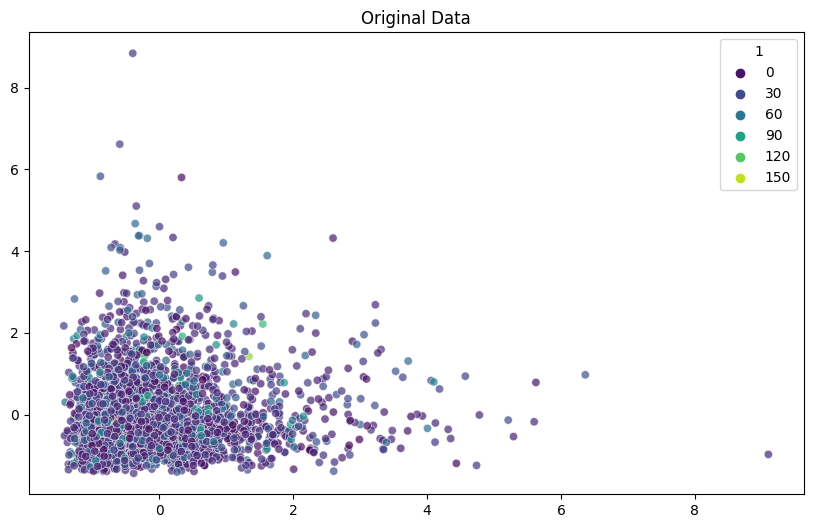

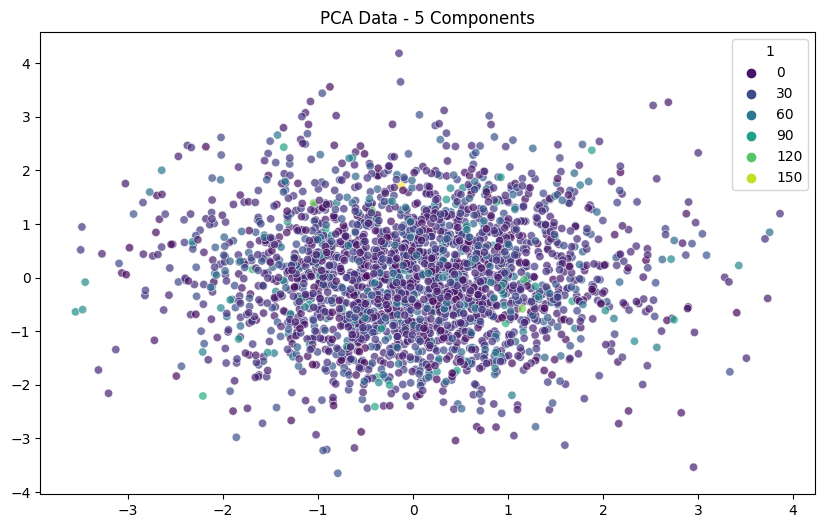

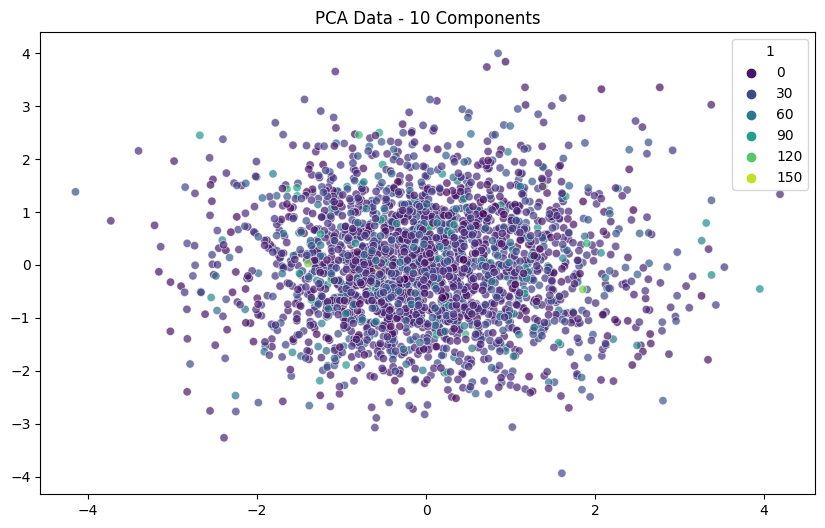

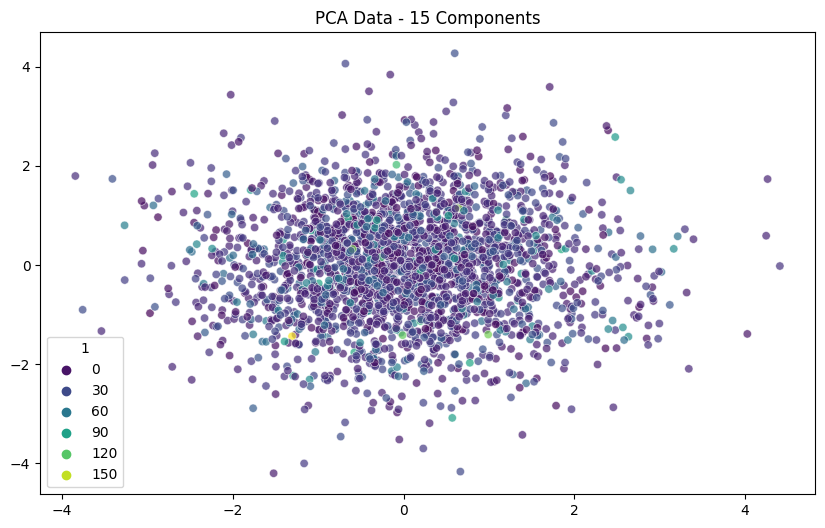

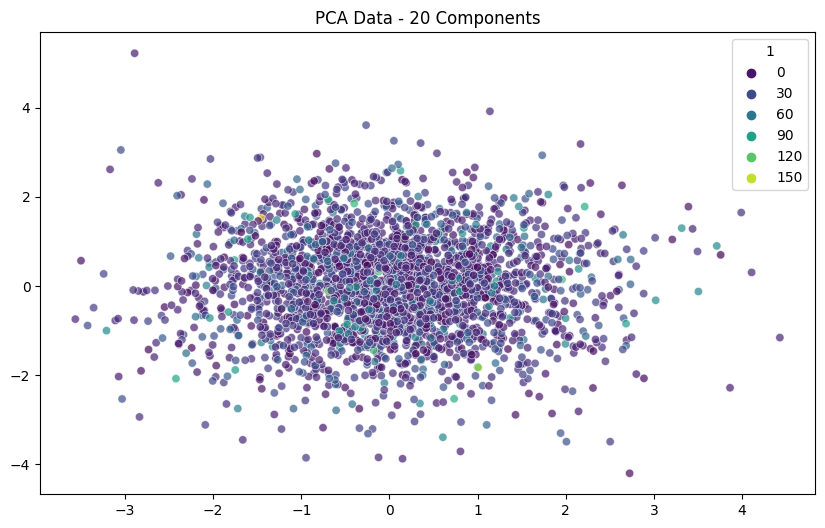

<Figure size 1200x800 with 0 Axes>

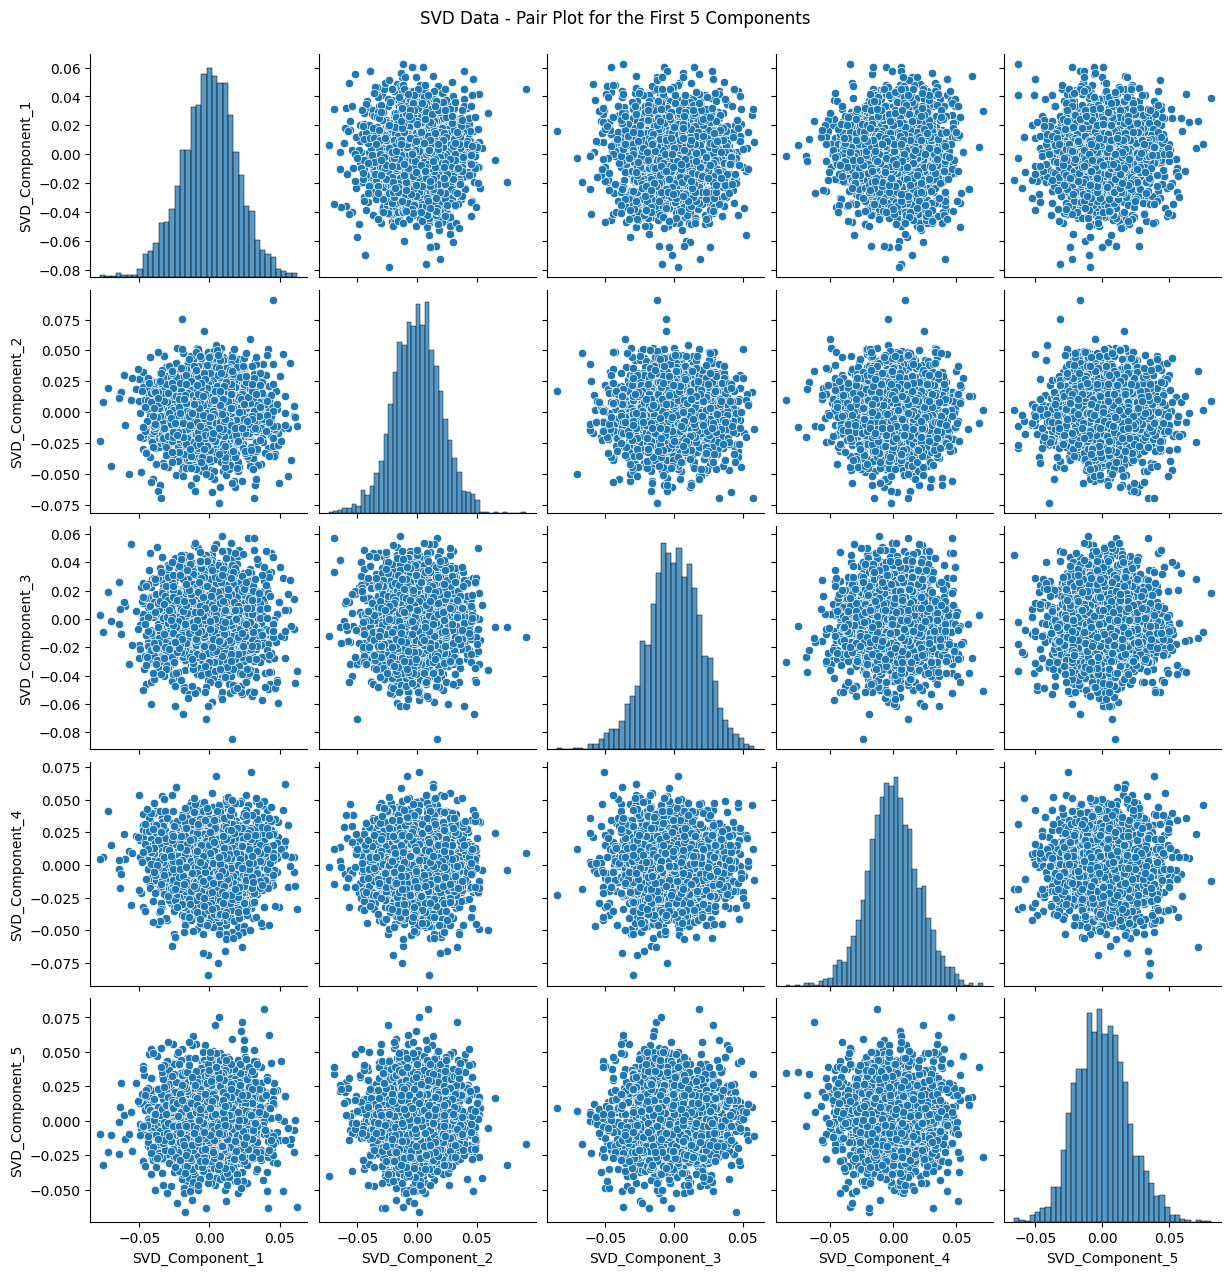


Exploratory Data Analysis on SVD data with 5 columns:
       SVD_Component_1  SVD_Component_2  SVD_Component_3  SVD_Component_4  \
count     2.500000e+03     2.500000e+03     2.500000e+03     2.500000e+03   
mean      3.996803e-19     1.598721e-18     2.059464e-18    -1.054712e-18   
std       2.000400e-02     2.000400e-02     2.000400e-02     2.000400e-02   
min      -7.788103e-02    -7.379958e-02    -8.499368e-02    -8.452152e-02   
25%      -1.269769e-02    -1.315262e-02    -1.257207e-02    -1.303313e-02   
50%       5.473256e-04    -2.886829e-05     6.841995e-05    -3.783542e-04   
75%       1.314972e-02     1.294197e-02     1.354836e-02     1.262618e-02   
max       6.243884e-02     9.072575e-02     5.845942e-02     7.074119e-02   

       SVD_Component_5  
count     2.500000e+03  
mean     -3.330669e-20  
std       2.000400e-02  
min      -6.588902e-02  
25%      -1.396009e-02  
50%      -7.458752e-04  
75%       1.286081e-02  
max       8.144980e-02  


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming the first column is an index
df = pd.read_csv(file_path, index_col=0)

# Separating features and target variable (if any)
X = df.drop(columns=['1'])
y = df['1']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizing the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title('Original Data')
plt.show()

# Performing PCA
def apply_pca(n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca, pca

# Applying PCA with 5, 10, 15, and 20 components
n_components_list = [5, 10, 15, 20]
pca_results = {}

for n_components in n_components_list:
    X_pca, pca = apply_pca(n_components)
    pca_results[n_components] = X_pca

    # Visualizing PCA data
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.7)
    plt.title(f'PCA Data - {n_components} Components')
    plt.show()

# Singular Value Decomposition (SVD)
u, s, vt = np.linalg.svd(X_scaled, full_matrices=False)

# Choosing the first 5 columns after SVD
svd_results = pd.DataFrame(u[:, :5], columns=["SVD_Component_1", "SVD_Component_2", "SVD_Component_3", "SVD_Component_4", "SVD_Component_5"])

# Visualizing SVD data (Pair Plot for the first 5 components)
plt.figure(figsize=(12, 8))
sns.pairplot(svd_results[['SVD_Component_1', 'SVD_Component_2', 'SVD_Component_3', 'SVD_Component_4', 'SVD_Component_5']])
plt.suptitle('SVD Data - Pair Plot for the First 5 Components', y=1.02)
plt.show()

# Exploratory Data Analysis on SVD data with 5 columns
svd_data_analysis = svd_results.describe()

# Displaying the results
print("\nExploratory Data Analysis on SVD data with 5 columns:")
print(svd_data_analysis)

## 3. Use linear regression and LDA on data 3 to predict whether a given suburb has a crime rate above or below the median. Compare the findings from different methods.


In [17]:
#Importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Reading the Boston data
data = pd.read_csv('Boston.csv')

In [19]:
print('Shape of the given data: ', data.shape)

Shape of the given data:  (506, 14)


In [20]:
#Getting the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [21]:
#To get the statistical information about the data
data.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [22]:
#To see the null values in the data
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [23]:
# Printing the columns in the data
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [24]:
#Creating a new column in the dataframe which determines whether a value is above or below the median : 0 corresponds to below median, 1 corresponds to above median
crim_med = (data["crim"] > data["crim"].median()).map({False: 0, True: 1})
data["crim_med"] = crim_med

#Viewing the first 10 rows of the data with new column
data.head(10)

crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

    black  lstat  medv  crim_med  
0  396.90   4.98  24.0         0  
1  396.90   9.14  21.6         0  
2  392.83   4.03  34.7         0  
3  394.63   2.94  33.4         0  
4  396.90   5.33  36.2         0  
5  394.12   5.21  28.7         0  
6  395.60  12.43  22.9         0  
7  396.90  19.15  27.1         0  
8  386.63  29.93  16.5         0  
9  386.71  17.10  18.9         0

In [25]:
#To see the correlation of the data columns with crim
data.corr()["crim"]

crim        1.000000
zn         -0.200469
indus       0.406583
chas       -0.055892
nox         0.420972
rm         -0.219247
age         0.352734
dis        -0.379670
rad         0.625505
tax         0.582764
ptratio     0.289946
black      -0.385064
lstat       0.455621
medv       -0.388305
crim_med    0.409395
Name: crim, dtype: float64

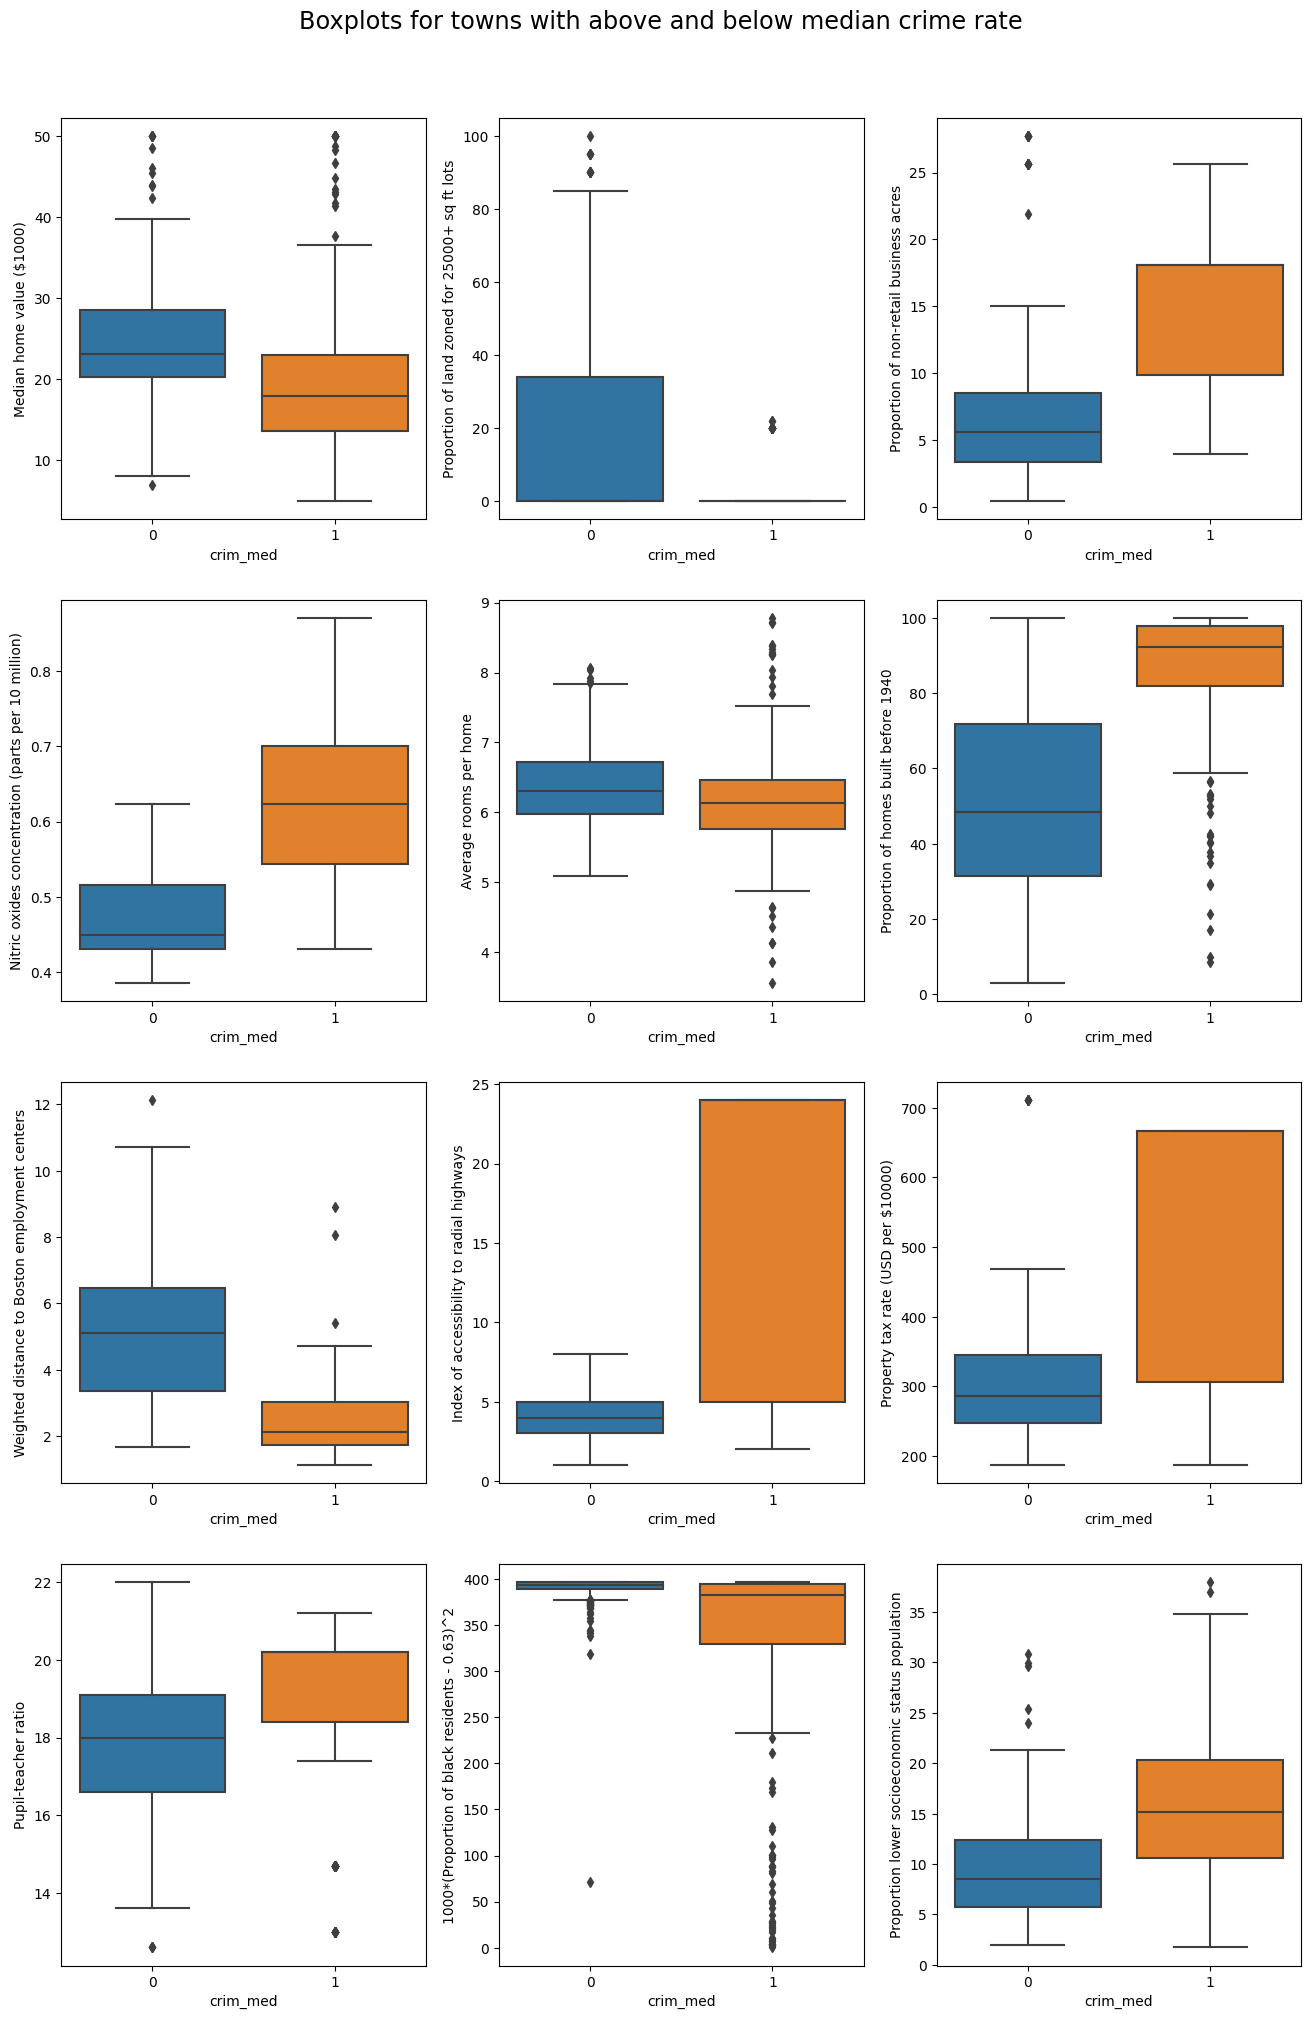

In [26]:
#To plot the box and whisker plot
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (16, 24))

sns.boxplot(x = "crim_med", y = "medv", data = data, ax = axes[0, 0])
axes[0, 0].set_ylabel("Median home value ($1000)")

sns.boxplot(x = "crim_med", y = "zn", data = data, ax = axes[0, 1])
axes[0, 1].set_ylabel("Proportion of land zoned for 25000+ sq ft lots")

sns.boxplot(x = "crim_med", y = "indus", data = data, ax = axes[0, 2])
axes[0, 2].set_ylabel("Proportion of non-retail business acres")

sns.boxplot(x = "crim_med", y = "nox", data = data, ax = axes[1, 0])
axes[1, 0].set_ylabel("Nitric oxides concentration (parts per 10 million)")

sns.boxplot(x = "crim_med", y = "rm", data = data, ax = axes[1, 1])
axes[1, 1].set_ylabel("Average rooms per home")

sns.boxplot(x = "crim_med", y = "age", data = data, ax = axes[1, 2])
axes[1, 2].set_ylabel("Proportion of homes built before 1940")

sns.boxplot(x = "crim_med", y = "dis", data = data, ax = axes[2, 0])
axes[2, 0].set_ylabel("Weighted distance to Boston employment centers")

sns.boxplot(x = "crim_med", y = "rad", data = data, ax = axes[2, 1])
axes[2, 1].set_ylabel("Index of accessibility to radial highways")

sns.boxplot(x = "crim_med", y = "tax", data = data, ax = axes[2, 2])
axes[2, 2].set_ylabel("Property tax rate (USD per $10000)")

sns.boxplot(x = "crim_med", y = "ptratio", data = data, ax = axes[3, 0])
axes[3, 0].set_ylabel("Pupil-teacher ratio")

sns.boxplot(x = "crim_med", y = "black", data = data, ax = axes[3, 1])
axes[3, 1].set_ylabel("1000*(Proportion of black residents - 0.63)^2")

sns.boxplot(x = "crim_med", y = "lstat", data = data, ax = axes[3, 2])
axes[3, 2].set_ylabel("Proportion lower socioeconomic status population")

fig.suptitle("Boxplots for towns with above and below median crime rate", size = "xx-large", y = 0.925);

<Axes: >

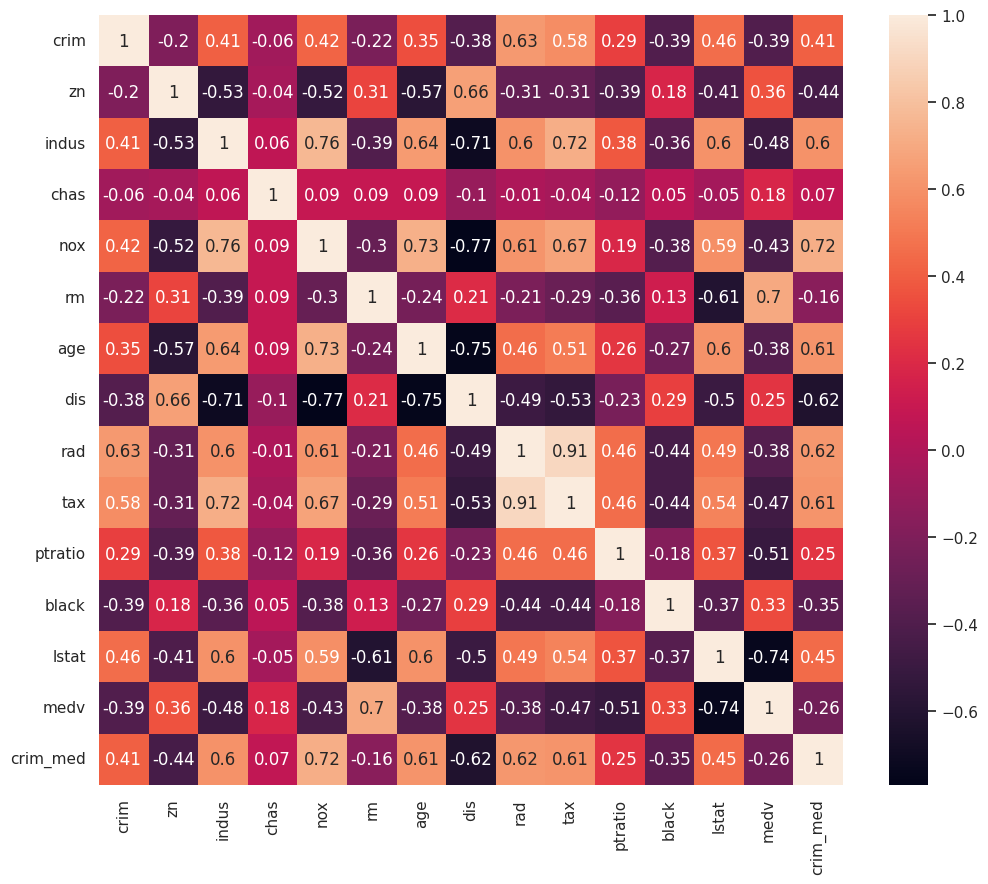

In [27]:
#Plotting the heatmap
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Variance influence factor dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

#To see all the highly correlated values
print(vif_data)

     feature         VIF
0       crim    2.131428
1         zn    2.920967
2      indus   14.513748
3       chas    1.176340
4        nox   80.070400
5         rm  136.796242
6        age   21.903488
7        dis   15.462682
8        rad   16.256148
9        tax   62.190801
10   ptratio   87.691565
11     black   21.577664
12     lstat   12.627871
13      medv   24.689191
14  crim_med    4.915128


In [29]:
# Deleting the columns which have the larger correlation with crim
data = data.drop(columns = ["rm","ptratio","nox","tax"])

In [30]:
# Correlation of all left columns with crim
data.corr()["crim"]

crim        1.000000
zn         -0.200469
indus       0.406583
chas       -0.055892
age         0.352734
dis        -0.379670
rad         0.625505
black      -0.385064
lstat       0.455621
medv       -0.388305
crim_med    0.409395
Name: crim, dtype: float64

<Axes: >

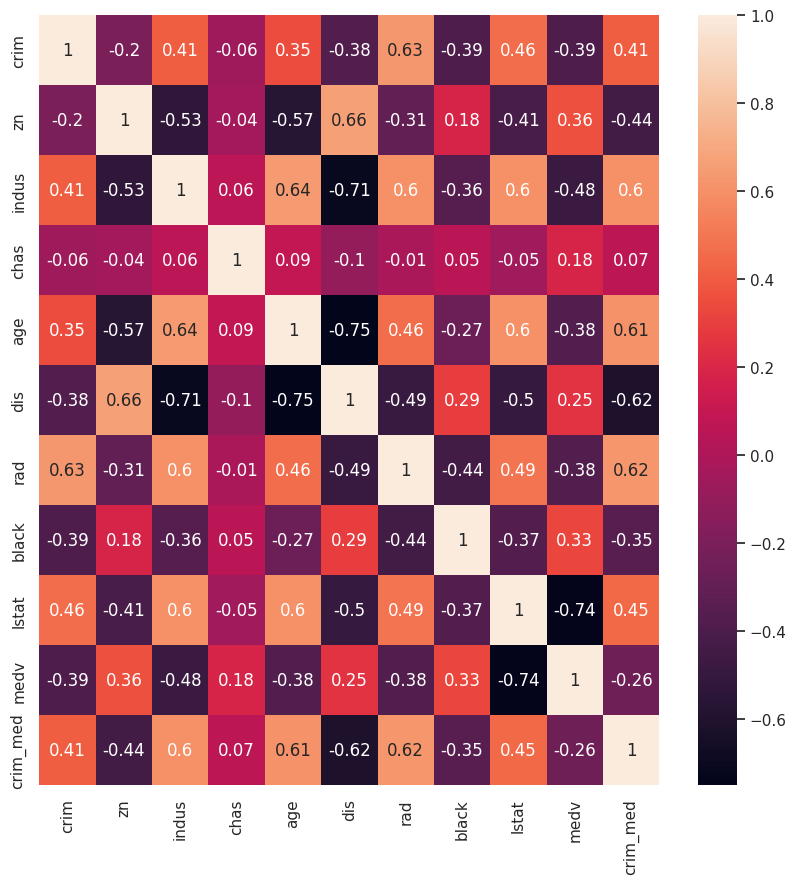

In [31]:
#Plotting the heatmap
sns.set(rc={'figure.figsize':(10, 10)})
correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Variance influence factor dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

#To see all the highly correlated values
print(vif_data)

     feature        VIF
0       crim   2.103319
1         zn   2.471690
2      indus   9.156571
3       chas   1.143117
4        age  17.449413
5        dis   8.885747
6        rad   5.468680
7      black  18.312477
8      lstat  10.941604
9       medv  11.588130
10  crim_med   4.514699


In [33]:
#Dividing the dataset into variables X and Y:

X = data.drop(columns = ["crim_med"])
#Except crim_med, all columns lie in X

Y = data["crim_med"]

In [34]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 4)

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()
model_reg = model_reg.fit(X_train,Y_train)
Y_pred = model_reg.predict(X_test)
Y_train_pred = model_reg.predict(X_train)

# Separating the results into 0 and 1
for i in range(len(Y_pred)):
    if(Y_pred[i] < 0.5):
        Y_pred[i] = 0
    else:
        Y_pred[i] = 1

In [36]:
# Finding R-squared and mean squared error:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 score : %.2f" % r2_score(Y_test,Y_pred))
print("Mean squared error: %.2f" % mean_squared_error(Y_test,Y_pred))

R2 score : 0.25
Mean squared error: 0.19


The confusion matrix corresponding to testing data is: 
[[45  8]
 [11 38]]
The accuracy attained for testing data is:  81.37254901960785 %


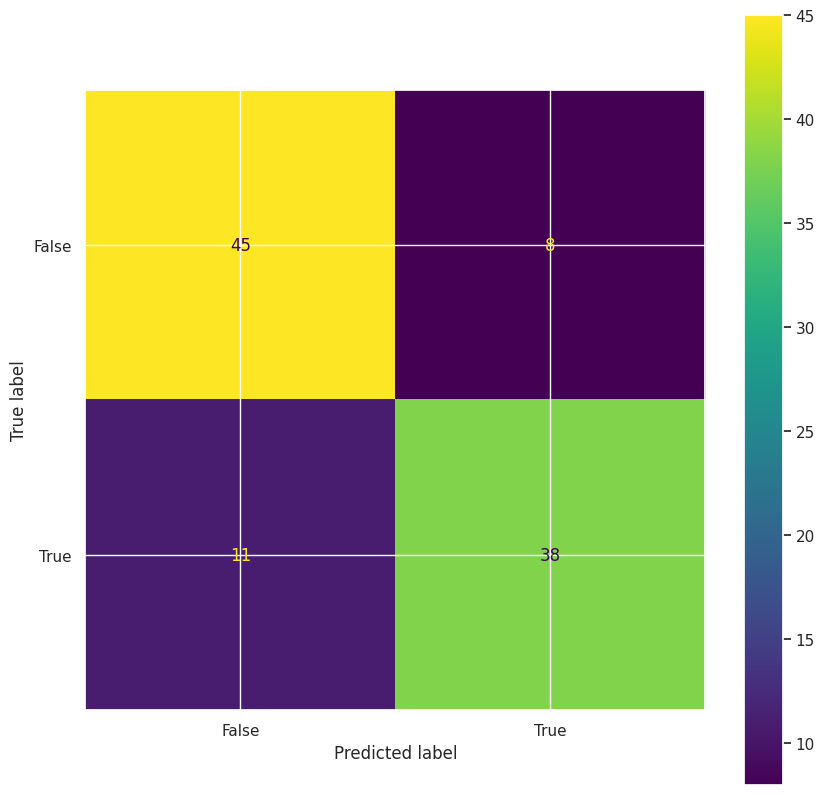

In [37]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print("The confusion matrix corresponding to testing data is: ")
print(cm)

#The accuracy of confusion matrix-
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0])
print('The accuracy attained for testing data is: ', 100*accuracy ,'%')

from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()


The confusion matrix for training data is: 
[[183  17]
 [ 44 160]]
The accuracy attained for training data is:  84.9009900990099 %


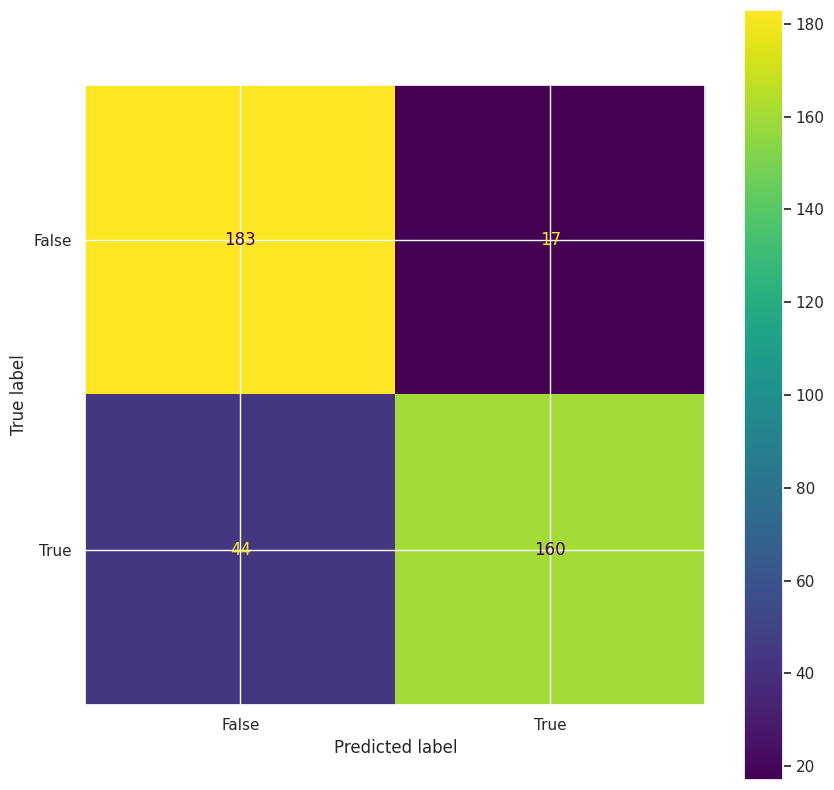

In [38]:
# Now we do the same separation for Y_train
for i in range(len(Y_train_pred)):
    if(Y_train_pred[i] < 0.5):
        Y_train_pred[i] = 0
    else:
        Y_train_pred[i] = 1

# Confusion matrix for training data-set
cm_train = confusion_matrix(Y_train, Y_train_pred)
print("The confusion matrix for training data is: ")
print(cm_train)

# The accuracy corresponding to linear regression training data-
accuracy = (cm_train[0][0]+cm_train[1][1])/(cm_train[0][0]+cm_train[1][1] + cm_train[0][1]+cm_train[1][0])
print('The accuracy attained for training data is: ', 100*accuracy ,'%')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [False, True])

cm_display.plot()
plt.show()

In [39]:
reg_coeff = model_reg.coef_
reg_intercept = model_reg.intercept_
print('The Linear Regression coefficients are:', reg_coeff)
print('The value of intercept is:', reg_intercept)

The Linear Regression coefficients are: [ 0.00037981 -0.00094907  0.01280105 -0.00412964  0.00525867 -0.01168553
  0.0195593  -0.00036874  0.00392519  0.00824843]
The value of intercept is: -0.23925016148496625


In [40]:
# Linear Discriminant Analysis
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
#Fitting the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA = model_LDA.fit(X_train,Y_train)


The confusion matrix corresponding to LDA training data is: 
[[183  17]
 [ 44 160]]
The accuracy attained for training data is:  84.9009900990099 %


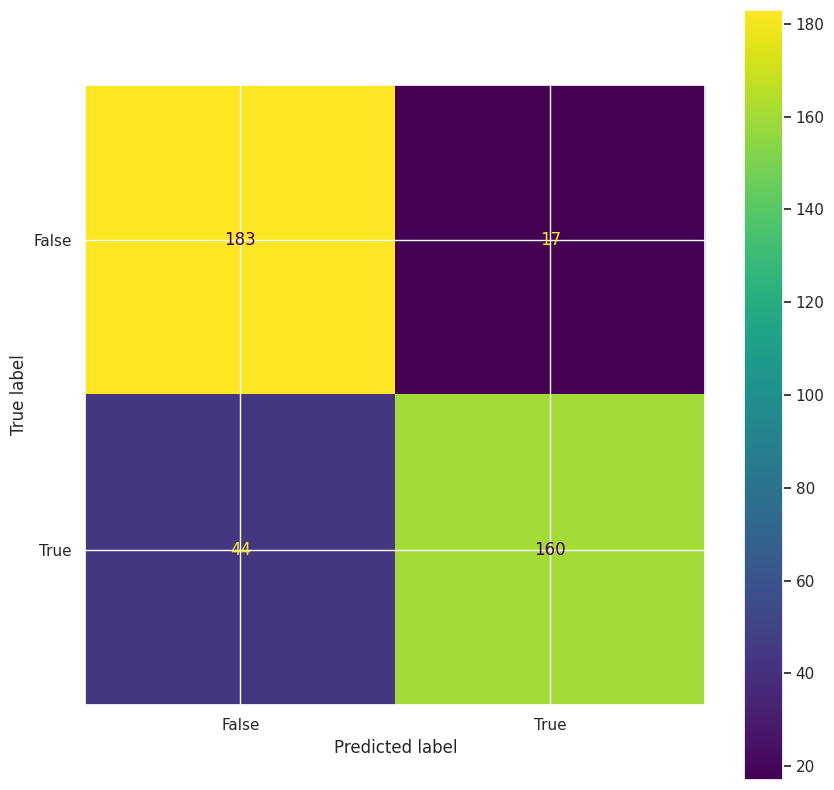

In [42]:
# LDA on training data-
Y_pred_train_LDA = model_LDA.predict(X_train)

# Confusion matrix on training data-
cm_train_LDA = confusion_matrix(Y_train,Y_pred_train_LDA)
print("The confusion matrix corresponding to LDA training data is: ")
print(cm_train_LDA)

# The accuracy of LDA training data-
accuracy_LDA = (cm_train_LDA[0][0]+cm_train_LDA[1][1])/(cm_train_LDA[0][0]+cm_train_LDA[1][1] + cm_train_LDA[0][1]+cm_train_LDA[1][0])
print('The accuracy attained for training data is: ', 100*accuracy_LDA ,'%')

from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_train_LDA, display_labels = [False, True])
cm_display.plot()
plt.show()

The confusion matrix corresponding to LDA testing data is: 
[[45  8]
 [11 38]]
The accuracy attained for testing data is:  81.37254901960785 %


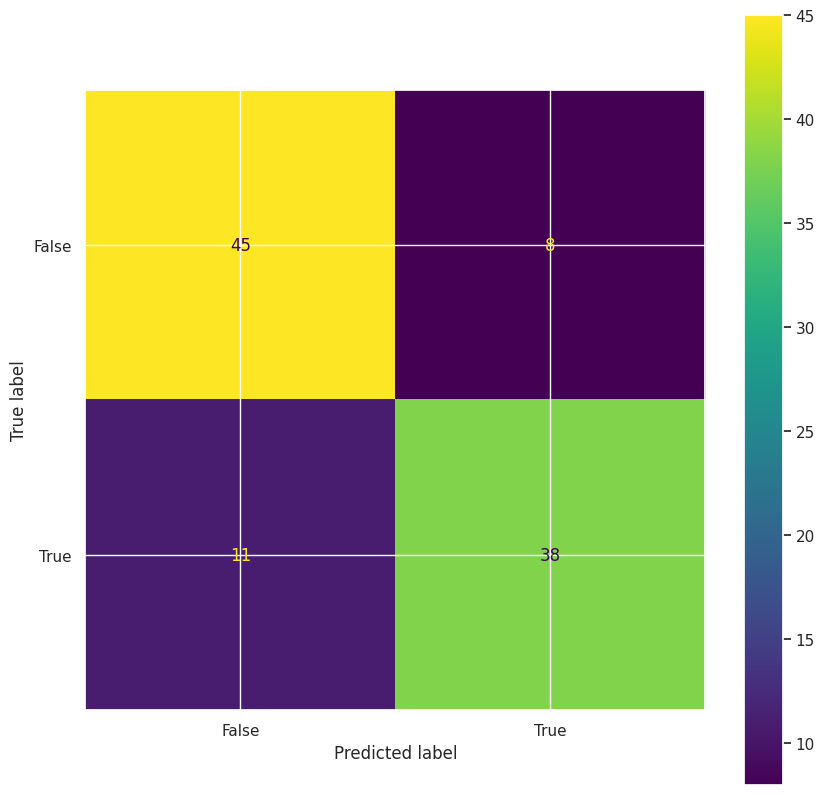

In [43]:
# LDA on testing data-
Y_pred_LDA = model_LDA.predict(X_test)

#Confusion matrix on test data-
cm_LDA = confusion_matrix(Y_test,Y_pred_LDA)
print("The confusion matrix corresponding to LDA testing data is: ")
print(cm_LDA)

#CALCULATING THE ACCURACY OF LDA TESTING DATA
accuracy_LDA = (cm_LDA[0][0]+cm_LDA[1][1])/(cm_LDA[0][0]+cm_LDA[1][1] + cm_LDA[0][1]+cm_LDA[1][0])
print('The accuracy attained for testing data is: ', 100*accuracy_LDA ,'%')

from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_LDA, display_labels = [False, True])

cm_display.plot()
plt.show()

**Conclusion:**

For the training data, the accuracy attained in case of Linear Regression and Linear Discriminant Analysis is 84.90%.

For the testing data, the accuracy attained in case of Linear Regression and Linear Discriminant Analysis is 81.37%.

Clearly, We can see that both the models give exactly same accuracy, so we can use any one of them for the Boston data.

## 4. Use the given image and compress it to 25, 65 and 85% of the original image using SVD.


In [44]:
!pip install scikit-image

In [45]:
import pandas as pd
import numpy as np
from scipy.linalg import svd

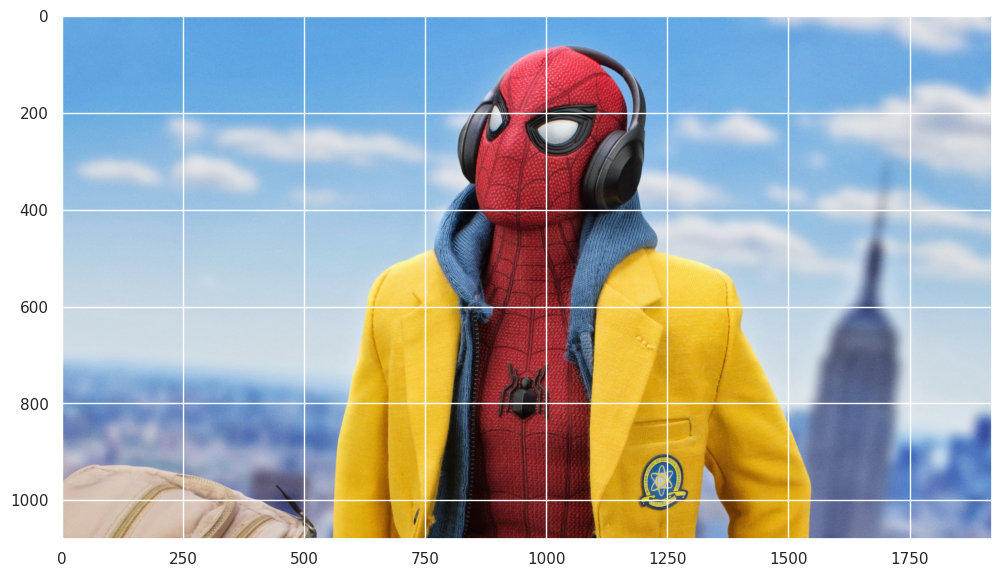

In [46]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize =(12,10))
from skimage.color import rgb2gray
image=plt.imread('Image 2.jpg')
plt.imshow(image)

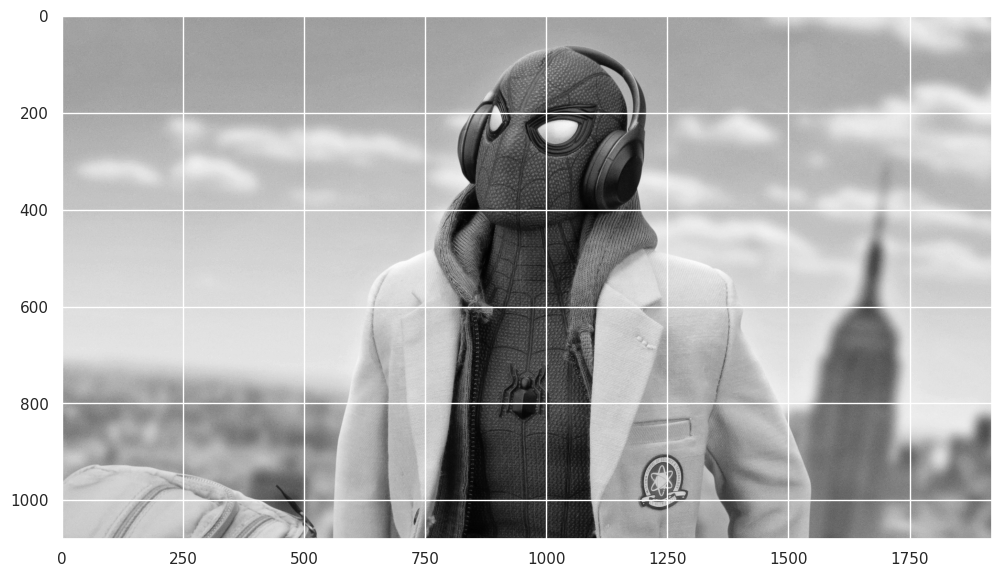

In [47]:
grayimage = rgb2gray(image)
plt.figure(figsize = (12, 10))
plt.imshow(grayimage, cmap='gray')

In [48]:
U, S, V_t= svd(grayimage)

In [49]:
singvals=S

In [50]:
S=np.diag(S)

In [51]:
sum = np.sum(singvals)
alphas = [0.85,0.65,0.25]#Amount of image to be preserved.
reduced_images=[]

for alpha in alphas:
    sumr = singvals[0]
    for r in range (1,len(singvals)):
        if sumr/sum >=alpha:
            break
        else :
            sumr+=singvals[r]
    reducedimage = U[:,:r]@S[:r,:r]@V_t[:r,:]
    reduced_images.append(reducedimage)


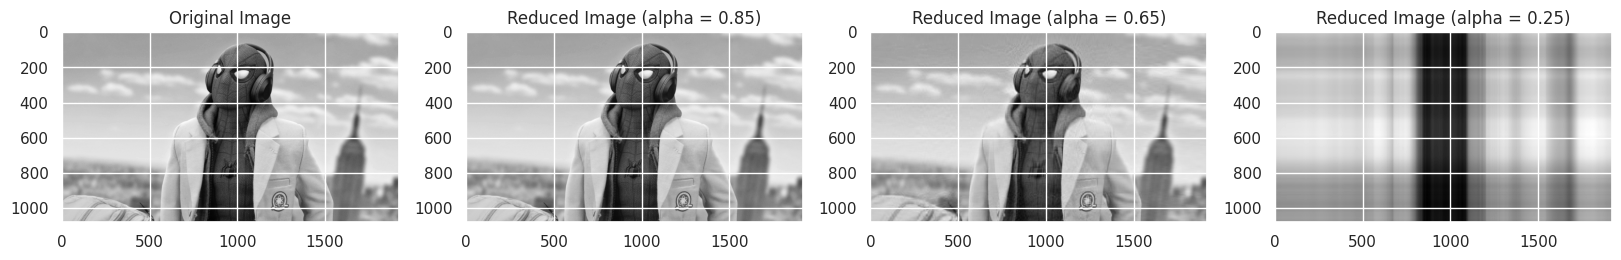

In [52]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.imshow(grayimage,cmap = 'gray')
plt.title('Original Image')
for i, alpha in enumerate(alphas):
    plt.subplot(1,4, i + 2)
    plt.imshow(reduced_images[i], cmap='gray')
    plt.title(f'Reduced Image (alpha = {alpha})')

plt.show()